In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Falling Stick Simulation

This project is inspired by the YouTube video [How long does it take a pencil to tip over? What about something longer?](https://www.youtube.com/watch?v=nwYNFBdRGR4) (last accessed: 14 July 2020).

In this project we investigate how long it take for a stick to fall down. The free body diagram of the system is shown on the figure bellow.

<img src="falling-stick-diagram.png" width="300" align="center"/>

The figure is from https://physics.stackexchange.com/a/625152.

## Lagrangian Derivation

The moment of inertia of a stick rotated about one end is given by:

$$
I = \dfrac{1}{3}mL^{2}.
$$

The kinetic energy of the system is:

$$
\begin{aligned}
K &= \dfrac{1}{2}I_{c}\omega^{2} + \underbrace{\dfrac{1}{2}mv_{c}^{\phantom{0}2}}_{=0\text{ (no translational energy)}} \\
&= \dfrac{1}{2}\left(\dfrac{1}{3}mL^{2}\right)\omega^{2} \\
&= \dfrac{1}{6}mL^{2}\omega^{2}.
\end{aligned}
$$

The potential energy of the system is:

$$
\begin{aligned}
P &= mgy_{c} \\
&= mg\frac{L}{2}(1 - \cos\theta).
\end{aligned}
$$

The Lagrangian $L$ of the system is defined as the difference between the kinetic and potential energies:

$$
L = K - P = \dfrac{1}{6}mL^{2}\omega^{2} - mg\dfrac{L}{2}(1 - \cos\theta).
$$

To find the angular acceleration of the falling stick, we use the Euler-Lagrange equation:

$$
\dfrac{d}{dt}\left(\dfrac{\partial L}{\partial \dot{\theta}}\right) - \dfrac{\partial L}{\partial \theta} = 0.
$$

Substituting the Lagrangian into this equation, we get:

$$
\dfrac{1}{3}mL^{2}\ddot{\theta} - mg\dfrac{L}{2}\sin\theta = 0.
$$

Solving for $\ddot{\theta}$ gives us the quantity:

$$
\alpha = \ddot{\theta} = \dfrac{3}{2}\dfrac{g}{L}\sin\theta.
$$

We conclude that the length of the stick is the only relevant property for this calculation, and the mass of the stick does not affect the result.

## Numerical Computation

To numerically calculate the time it takes for the stick to fall down, we start with the derived equation for angular acceleration:

$$
\alpha = \dfrac{3}{2}\dfrac{g}{L}\sin\theta = \dfrac{\Delta\omega}{\Delta t}
$$

where:
- $\alpha$ is the angular acceleration,
- $g$ is the gravitational acceleration ($9.81 m/s^2$),
- $L$ is the length of the stick,
- $\theta$ is the current angle of the stick with respect to the vertical axis.

From this equation, angular velocity $\omega$ can be obtained as the rate of change of angle over time:

$$
\omega = \dfrac{\Delta\theta}{\Delta t} 
$$

We have:

$$
\alpha = \dfrac{3}{2}\dfrac{g}{L}\sin\theta \\
\Delta\omega = \alpha\Delta t \\
\Delta\theta = \omega\Delta t.
$$

Therefore, to determine the time it takes for the stick to fall, we track the cumulative computation of time until the stick reaches its final angular position. 

### Euler Method

The Euler method is a simple numerical technique used to solve ODEs with a given initial value. In this context, it helps us approximate the angular velocity $\omega$, angle $\theta$, and consequently, the time $t$ it takes for the stick to fall. To numerically solve this differential equation, we use the Euler method, which involves discretizing the continuous variables  into discrete steps.

The Euler method is a numerical method used to solve ODEs starting from an initial value. It helps us estimate the angular velocity $\omega$, the angle $\theta$, and the time $t$ it takes for the stick to fall. This method breaks down these continuous variables into $n$ steps to compute their values over time.

**Steps:**
1. $\alpha_n = \dfrac{3}{2}\dfrac{g}{L}\sin\theta_n$
2. $\omega_{n+1} = \omega_{n} + \alpha_n\Delta t $
3. $\theta_{n+1} = \theta_{n} + \omega_n\Delta t $
4. $t_{n+1} = t_{n} + \Delta t $

The initial values are $\theta_0 = 0.1 rad$ (it can't be zero because $\sin 0 = 0$), $\omega_0 = 0 rad/s$ and $t = 0 s$ with step size $\Delta t = 0.001 s$.

These values are updated iteratively until $\theta_n$ reaches $\pi/2$, indicating that the stick has fallen completely.

In [2]:
def calculate_time_euler(L, initial_theta=0.1, initial_omega=0, dt=0.001):
    """
    Calculate the time it takes for a stick to fall from an initial angle using Euler method.
    
    Parameters:
    L (float): Length of the stick
    initial_theta (float): Initial angle in radians (default is 0.1)
    initial_omega (float): Initial angular velocity (default is 0)
    dt (float): Time step for the numerical integration (default is 0.001)
    
    Returns:
    float: Time taken for the stick to fall down in seconds
    """
    g = 9.81 # gravitational acceleration
    theta = initial_theta
    omega = initial_omega
    t = 0

    while theta < np.pi/2: # when the stick falls, theta = 90 deg
        alpha = (3/2) * (g/L) * np.sin(theta)
        omega = omega + alpha * dt
        theta = theta + omega * dt
        t = t + dt
        
    return t

# Example usage
L = .15 # Length of the stick in meters
time_to_fall = calculate_time_euler(L)
print(f'Time to fall down = {time_to_fall:.5f} sec')


Time to fall down = 0.35400 sec


### Runge-Kutta Method
For improved accuracy, the Runge-Kutta method (4th order) can be used. This method is more accurate than the Euler method, particularly for systems with non-linear dynamics.

The Runge-Kutta method uses intermediate steps to calculate the next value of the dependent variable, thereby reducing the error. The general form of the 4th order Runge-Kutta method for updating $\theta$ and $\omega$ is as follows:

1. Compute the intermediate slopes:
   - $k_1$ based on the initial values using Euler method.
   - $k_2$ based on the values at the midpoint of the interval using $k_1$.
   - $k_3$ based on the values at the midpoint of the interval using $k_2$.
   - $k_4$ based on the values at the end of the interval using $k_3$.
2. Update the variables using a weighted average of these slopes:
   - $\theta_{n+1}​=\theta_n ​+ \dfrac{\Delta t}{6}​(k_{1\theta}​+2k_{2\theta}​+2k_{3\theta}​+k_{4\theta}​),$
   - $\omega_{n+1}​=\omega_n ​+ \dfrac{\Delta t}{6}​(k_{1\omega}​+2k_{2\omega}​+2k_{3\omega}​+k_{4\omega}​),$

where:
- $k_{1\theta} = \omega_n$,
- $k_{1\omega} = \dfrac{3}{2}\dfrac{g}{L}\sin\theta_n$,
- The subsequent values for the slopes are similarly computed using the updated $\theta$ and $\omega$ values at the respective intermediate steps.

In [3]:
def calculate_time_rk4(L, initial_theta=0.1, initial_omega=0, dt=0.001):
    """
    Calculate the time it takes for a stick to fall from an initial angle using the 4th-order Runge-Kutta method.
    
    Parameters:
    L (float): Length of the stick
    initial_theta (float): Initial angle in radians (default is 0.1)
    initial_omega (float): Initial angular velocity (default is 0)
    dt (float): Time step for the numerical integration (default is 0.001)
    
    Returns:
    float: Time taken for the stick to fall down in seconds
    """
    g = 9.81 # gravitational acceleration
    theta = initial_theta
    omega = initial_omega
    t = 0

    def derivatives(theta, omega):
        alpha = (3/2) * (g/L) * np.sin(theta)
        return omega, alpha

    while theta < np.pi/2:
        k1_theta, k1_omega = derivatives(theta, omega)
        k2_theta, k2_omega = derivatives(theta + 0.5*dt*k1_theta, omega + 0.5*dt*k1_omega)
        k3_theta, k3_omega = derivatives(theta + 0.5*dt*k2_theta, omega + 0.5*dt*k2_omega)
        k4_theta, k4_omega = derivatives(theta + dt*k3_theta, omega + dt*k3_omega)
        
        theta += (dt / 6) * (k1_theta + 2*k2_theta + 2*k3_theta + k4_theta)
        omega += (dt / 6) * (k1_omega + 2*k2_omega + 2*k3_omega + k4_omega)
        t += dt

    return t

# Example usage
L = .15 # Length of the stick in meters
time_to_fall_rk4 = calculate_time_rk4(L)
print(f'Time to fall down using RK4 = {time_to_fall_rk4:.5f} sec')

Time to fall down using RK4 = 0.35400 sec


## Experiment

To validate the numerical results, we experimentally measure the time it takes for a $15 cm$ long pen to fall. The measured times are as follows:

$$
t=[0.40,0.34,0.39,0.33,0.33,0.34,0.33,0.39,0.39,0.33].
$$

These measurements are then visualized using a histogram:

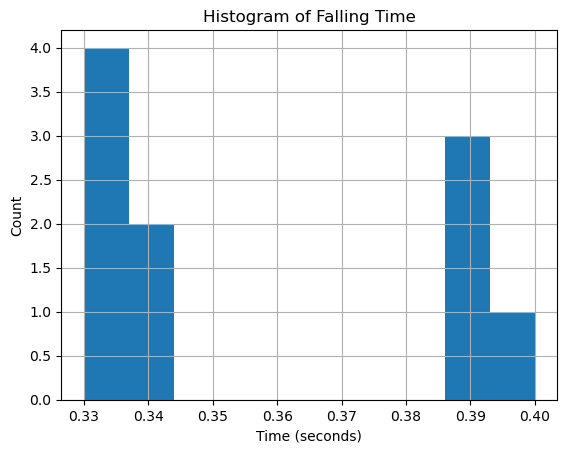

In [4]:
time = np.array([0.40, 0.34, 0.39, 0.33, 0.33, 0.34, 0.33, 0.39, 0.39, 0.33])
time_df = pd.DataFrame({'Time': time})

plt.hist(time_df['Time'])
plt.xlabel('Time (seconds)')
plt.ylabel('Count')
plt.title('Histogram of Falling Time')
plt.grid(True)
plt.show()

The average falling time is:

In [5]:
t_average = time.mean()
print(f'{t_average:.5f}')

0.35700


From the histogram and the average time, we conclude that the numerical simulation agrees well with the experimental data.